In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib

In [143]:
df=pd.read_csv('Restaurant_Food_Cost_Train.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


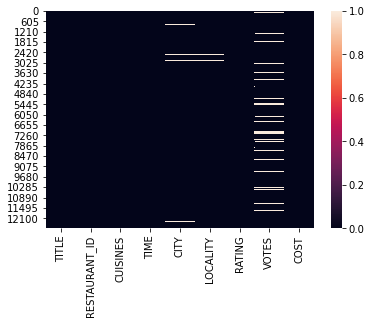

In [145]:
sns.heatmap(data=df.isna())

In [146]:
df=df.dropna()
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [147]:
df.isin(['?','-1']).sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [148]:
#droping RESTAURANT_ID as it is just an id column
df=df.drop('RESTAURANT_ID',axis=1)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [149]:
title_ = df.TITLE.str.split(',',expand=True).stack()
print(title_)
print("**************************************************")
print(pd.get_dummies(title_))
title_=pd.get_dummies(title_).groupby(level=0).sum()
print("********************----******************************")
print(title_)
print("**************************************************")
title_=title_.astype(int)
print(title_)
print(title_.dtypes)

0      0    CASUAL DINING
1      0    CASUAL DINING
       1              BAR
2      0    CASUAL DINING
3      0      QUICK BITES
                ...      
12686  0    CASUAL DINING
       1              BAR
12687  0           LOUNGE
12688  0    CASUAL DINING
12689  0    CASUAL DINING
Length: 12802, dtype: object
**************************************************
         BAKERY  BAR  BEVERAGE SHOP  CAFÉ  CASUAL DINING  CLUB  COCKTAIL BAR  \
0     0       0    0              0     0              1     0             0   
1     0       0    0              0     0              1     0             0   
      1       0    1              0     0              0     0             0   
2     0       0    0              0     0              1     0             0   
3     0       0    0              0     0              0     0             0   
...         ...  ...            ...   ...            ...   ...           ...   
12686 0       0    0              0     0              1     0            

In [150]:
title_1=title_.sum().sort_values()
print(title_1)
count=0
list_=[]
for index_ in title_1.index:
    count=count+1
    if(count<=10):
        list_.append(index_)

print(list_)        

MEAT SHOP            3
IRANI CAFE           3
PAAN SHOP            4
COCKTAIL BAR         4
CONFECTIONERY        5
CLUB                26
FOOD TRUCK          27
DHABA               44
MESS                52
KIOSK               59
MICROBREWERY        69
FOOD COURT         103
PUB                136
SWEET SHOP         151
LOUNGE             197
BEVERAGE SHOP      201
FINE DINING        355
BAKERY             456
DESSERT PARLOR     563
BAR                654
CAFÉ               768
None               800
QUICK BITES       4028
CASUAL DINING     4094
dtype: int64
['MEAT SHOP', 'IRANI CAFE', 'PAAN SHOP', 'COCKTAIL BAR', 'CONFECTIONERY', 'CLUB', 'FOOD TRUCK', 'DHABA', 'MESS', 'KIOSK']


In [151]:
title_=title_.drop(list_,axis=1)
title_

,BAKERY,BAR,BEVERAGE SHOP,CAFÉ,CASUAL DINING,DESSERT PARLOR,FINE DINING,FOOD COURT,LOUNGE,MICROBREWERY,None,PUB,QUICK BITES,SWEET SHOP
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12686,0,1,0,0,1,0,0,0,0,0,0,0,0,0
12687,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12688,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [152]:
df=pd.concat([df,title_],axis=1)
df=df.drop('TITLE',axis=1)
df

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,BAKERY,BAR,BEVERAGE SHOP,...,CASUAL DINING,DESSERT PARLOR,FINE DINING,FOOD COURT,LOUNGE,MICROBREWERY,None,PUB,QUICK BITES,SWEET SHOP
0,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,1,0,...,1,0,0,0,0,0,0,0,0,0
12687,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12688,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [153]:
imputer=SimpleImputer(missing_values='',strategy='most_frequent')
df['CUISINES']=imputer.fit_transform(df[['CUISINES']]).ravel()
imputer=SimpleImputer(missing_values=' ',strategy='most_frequent')
df['CUISINES']=imputer.fit_transform(df[['CUISINES']]).ravel()

cuisine_ = df.CUISINES.str.split(',',expand=True).stack()
cuisine_=cuisine_.str.strip()
print(cuisine_)
print('space',cuisine_.isin(['']).sum())
print("**************************************************")
cuisine_=pd.get_dummies(cuisine_).groupby(level=0).sum()
cuisine_=cuisine_.drop([''],axis=1)
cuisine_=cuisine_.astype(int)
print(cuisine_)
print(cuisine_.dtypes)

0      0          Malwani
       1             Goan
       2     North Indian
1      0            Asian
       1    Modern Indian
                ...      
12688  1     South Indian
       2          Chinese
       3      Street Food
12689  0     North Indian
       1          Chinese
Length: 29653, dtype: object
space 90
**************************************************
       Afghan  African  American  Andhra  Arabian  Armenian  Asian  Assamese  \
0           0        0         0       0        0         0      0         0   
1           0        0         0       0        0         0      1         0   
2           0        0         0       0        0         0      0         0   
3           0        0         0       0        0         0      0         0   
4           0        0         0       0        0         0      0         0   
...       ...      ...       ...     ...      ...       ...    ...       ...   
12685       0        0         0       0        0         0      

In [154]:
cuisine_1=cuisine_.sum().sort_values()
count=0
list_=[]
for index_ in cuisine_1.index:
    count=count+1
    if(count<=100):
        list_.append(index_)

print(list_)    

['Cuisine Varies', 'Egyptian', 'Dumplings', 'Peruvian', 'Satay', 'Jewish', 'Oriental', 'Modern Australian', 'Irish', 'Vegan', 'Armenian', 'Hot dogs', 'Hot Pot', 'African', 'Assamese', 'Fusion', 'Mongolian', 'Russian', 'Pakistani', 'Coffee and Tea', 'Pan Asian', 'Greek', 'Belgian', 'South American', 'Raw Meats', 'Panini', 'Moroccan', 'Tamil', 'Cantonese', 'Bohri', 'German', 'Roast Chicken', 'British', 'Paan', 'Sindhi', 'Poké', 'Cafe Food', 'Drinks Only', 'Portuguese', 'Bubble Tea', 'Naga', 'Kashmiri', 'Grill', 'Iranian', 'Charcoal Chicken', 'Bihari', 'Sri Lankan', 'Nepalese', 'Singaporean', 'Lucknowi', 'Turkish', 'North Eastern', 'Afghan', 'Spanish', 'Tex-Mex', 'Indonesian', 'Parsi', 'Awadhi', 'Oriya', 'French', 'Konkan', 'Middle Eastern', 'Burmese', 'Wraps', 'Vietnamese', 'Bar Food', 'Indian', 'Goan', 'Korean', 'Coffee', 'Malaysian', 'Gujarati', 'Steak', 'Rajasthani', 'Tibetan', 'Sushi', 'Malwani', 'Tea', 'Mangalorean', 'Modern Indian', 'Maharashtrian', 'Bengali', 'Chettinad', 'Japanes

In [155]:
cuisine_=cuisine_.drop(list_,axis=1)
cuisine_

,Arabian,Asian,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,...,Italian,Kerala,Momos,Mughlai,North Indian,Pizza,Seafood,South Indian,Street Food,Thai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12686,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12687,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12688,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [156]:
df=pd.concat([df,cuisine_],axis=1)
df=df.drop('CUISINES',axis=1)
df

,TIME,CITY,LOCALITY,RATING,VOTES,COST,BAKERY,BAR,BEVERAGE SHOP,CAFÉ,...,Italian,Kerala,Momos,Mughlai,North Indian,Pizza,Seafood,South Indian,Street Food,Thai
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [157]:
df.isna().sum()

TIME              0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
COST              0
BAKERY            0
BAR               0
BEVERAGE SHOP     0
CAFÉ              0
CASUAL DINING     0
DESSERT PARLOR    0
FINE DINING       0
FOOD COURT        0
LOUNGE            0
MICROBREWERY      0
None              0
PUB               0
QUICK BITES       0
SWEET SHOP        0
Arabian           0
Asian             0
Bakery            0
Beverages         0
Biryani           0
Burger            0
Cafe              0
Chinese           0
Continental       0
Desserts          0
Fast Food         0
Ice Cream         0
Italian           0
Kerala            0
Momos             0
Mughlai           0
North Indian      0
Pizza             0
Seafood           0
South Indian      0
Street Food       0
Thai              0
dtype: int64

In [158]:
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [159]:
df

,TIME,CITY,LOCALITY,RATING,VOTES,COST,BAKERY,BAR,BEVERAGE SHOP,CAFÉ,...,Italian,Kerala,Momos,Mughlai,North Indian,Pizza,Seafood,South Indian,Street Food,Thai
0,700,300,267,16,1277,1200,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1799,63,961,22,949,1500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,623,63,1015,18,711,800,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,257,206,128,21,786,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,581,206,573,18,469,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,1093,125,318,18,1348,500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12686,1125,206,125,23,191,1800,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,1086,223,1241,20,1427,1300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,1754,63,584,15,995,400,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [160]:
df.skew()

TIME               0.306350
CITY               0.294861
LOCALITY           0.335364
RATING            -0.517737
VOTES             -0.185576
COST               3.897526
BAKERY             4.693841
BAR                3.805943
BEVERAGE SHOP      7.328963
CAFÉ               3.451095
CASUAL DINING      0.586381
DESSERT PARLOR     4.158458
FINE DINING        5.397480
FOOD COURT        10.375409
LOUNGE             7.407059
MICROBREWERY      12.734392
None               3.364484
PUB                8.989183
QUICK BITES        0.612749
SWEET SHOP         8.513686
Arabian            5.380812
Asian              4.996773
Bakery             4.145573
Beverages          3.240772
Biryani            2.619558
Burger             5.703487
Cafe               3.473535
Chinese            0.598730
Continental        2.231134
Desserts           2.825751
Fast Food          1.806874
Ice Cream          5.665086
Italian            2.753013
Kerala             5.553893
Momos              5.307450
Mughlai            3

In [161]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

In [162]:
df.skew()

TIME               0.306350
CITY               0.294861
LOCALITY           0.335364
RATING            -0.517737
VOTES             -0.185576
COST               0.385321
BAKERY             4.693841
BAR                3.805943
BEVERAGE SHOP      7.328963
CAFÉ               3.451095
CASUAL DINING      0.586381
DESSERT PARLOR     4.158458
FINE DINING        5.397480
FOOD COURT        10.375409
LOUNGE             7.407059
MICROBREWERY      12.734392
None               3.364484
PUB                8.989183
QUICK BITES        0.612749
SWEET SHOP         8.513686
Arabian            5.380812
Asian              4.996773
Bakery             4.145573
Beverages          3.240772
Biryani            2.619558
Burger             5.703487
Cafe               3.473535
Chinese            0.598730
Continental        2.231134
Desserts           2.825751
Fast Food          1.806874
Ice Cream          5.665086
Italian            2.753013
Kerala             5.553893
Momos              5.307450
Mughlai            3

In [163]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [164]:
x=df.drop(['COST'],axis=1)
y_train=df['COST']

In [165]:
standardScaler=StandardScaler()
x_train=standardScaler.fit_transform(x)
x_train

array([[-0.62866567,  2.28101579, -0.97069977, ..., -0.69471563,
         0.        ,  0.        ],
       [-0.73918096, -0.75261466,  1.06621942, ..., -0.69471563,
         0.        ,  0.        ],
       [-1.26448741,  1.07780371, -1.34921817, ..., -0.69471563,
         0.        ,  0.        ],
       ...,
       [-0.88127205, -0.53501248,  0.10494606, ..., -0.69471563,
         0.        ,  0.        ],
       [-0.88127205,  1.46180757,  0.1321776 , ..., -0.69471563,
         0.        ,  0.        ],
       [-0.4937509 ,  0.04099331,  1.65714383, ..., -0.69471563,
         0.        ,  0.        ]])

In [166]:
df=pd.read_csv('Restaurant_Food_Cost_Test.csv')
df=df.dropna()
df.isin(['?','-1']).sum()

#droping RESTAURANT_ID as it is just an id column
df=df.drop('RESTAURANT_ID',axis=1)
df
print(df.TITLE.str.split(',',expand=True))

title_ = df.TITLE.str.split(',',expand=True).stack()
print(title_)
print("**************************************************")
print(pd.get_dummies(title_))
print("**************************************************")
title_=pd.get_dummies(title_).groupby(level=0).sum()
title_=title_.astype(int)
print(title_)
print(title_.dtypes)


title_1=title_.sum().sort_values()
count=0
list_=[]
for index_ in title_1.index:
    count=count+1
    if(count<=10):
        list_.append(index_)

print(list_)  


title_=title_.drop(list_,axis=1)
title_


df=pd.concat([df,title_],axis=1)
df=df.drop('TITLE',axis=1)
df


imputer=SimpleImputer(missing_values='',strategy='most_frequent')
df['CUISINES']=imputer.fit_transform(df[['CUISINES']]).ravel()
imputer=SimpleImputer(missing_values=' ',strategy='most_frequent')
df['CUISINES']=imputer.fit_transform(df[['CUISINES']]).ravel()

cuisine_test = df.CUISINES.str.split(',',expand=True).stack()
cuisine_test=cuisine_test.str.strip()
print(cuisine_test)
print('space',cuisine_test.isin(['']).sum())
print("**************************************************")
cuisine_test=pd.get_dummies(cuisine_test).groupby(level=0).sum()
cuisine_test=cuisine_test.drop([''],axis=1)
cuisine_test=cuisine_test.astype(int)
print(cuisine_test)
print(cuisine_test.dtypes)


cuisine_1=cuisine_test.sum().sort_values()
count=0
list_=[]
for index_ in cuisine_1.index:
    count=count+1
    if(count<=100):
        list_.append(index_)

print(list_)  


cuisine_test=cuisine_test.drop(list_,axis=1)
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")

print(cuisine_test)

list_col_remove=[]
list_col_add=[]
flag=False
for col in cuisine_test.columns:
    flag=False
    for col1 in cuisine_.columns:
        if(col==col1):
            flag=True
            break
    if(not flag):
        list_col_remove.append(col)

        
cuisine_test=cuisine_test.drop(list_col_remove,axis=1)
print(cuisine_test.shape)        

for col in cuisine_.columns:
    flag=False
    for col1 in cuisine_test.columns:
        if(col==col1):
            flag=True
            break
    if(not flag):
        list_col_add.append(col)
        
for col_add in list_col_add:
    cuisine_test[col_add]= 0
        
print("------------------------",cuisine_test)
df=pd.concat([df,cuisine_test],axis=1)
df=df.drop('CUISINES',axis=1)
df


for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])
        
x_test=df        

                  0     1
0     CASUAL DINING  None
1       QUICK BITES  None
2     CASUAL DINING  None
3              None  None
4       QUICK BITES  None
...             ...   ...
4225    QUICK BITES  None
4226  CASUAL DINING  None
4227           None  None
4228    QUICK BITES  None
4230    QUICK BITES  None

[3797 rows x 2 columns]
0     0    CASUAL DINING
1     0      QUICK BITES
2     0    CASUAL DINING
3     0             None
4     0      QUICK BITES
               ...      
4225  0      QUICK BITES
4226  0    CASUAL DINING
4227  0             None
4228  0      QUICK BITES
4230  0      QUICK BITES
Length: 4235, dtype: object
**************************************************
        BAKERY  BAR  BEVERAGE SHOP  BHOJANALYA  CAFÉ  CASUAL DINING  CLUB  \
0    0       0    0              0           0     0              1     0   
1    0       0    0              0           0     0              0     0   
2    0       0    0              0           0     0              1     0   
3

In [167]:
x_test

,TIME,CITY,LOCALITY,RATING,VOTES,BAKERY,BAR,BEVERAGE SHOP,CAFÉ,CASUAL DINING,...,Cafe,Desserts,Ice Cream,Kerala,Momos,Mughlai,Pizza,Seafood,Street Food,Thai
0,480,103,619,22,822,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,886,90,208,21,869,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206,90,388,17,574,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1013,41,433,17,179,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,198,74,283,15,394,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,784,90,208,19,321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4226,96,101,557,18,487,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4227,249,9,224,22,721,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,994,41,651,16,788,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
standardScaler=StandardScaler()
x_test=standardScaler.fit_transform(x_test)
x_test

array([[-0.04079691,  1.32748923,  1.18179588, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.23180085,  0.96891509, -0.68541634, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89964368,  0.96891509,  0.13234084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.76486115, -1.26527758, -0.61272681, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.5703244 , -0.38263356,  1.32717493, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79610852, -1.29286021,  0.83197753, ...,  0.        ,
         0.        ,  0.        ]])

In [169]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [170]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [171]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_train)
    cross_val_list.append(cross_val_score(reg_obj,x_train,y_train,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_train,y_pred))
    mse_list.append(mean_squared_error(y_train,y_pred))
    mae_list.append(mean_absolute_error(y_train,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [172]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,0.495668,0.501562,1.642498e-01,3.113694e-01,0.501562
1,SVR,0.546791,0.658878,1.124097e-01,2.476350e-01,0.658878
2,DecisionTreeRegressor,0.136896,1.000000,2.146560e-32,2.416812e-17,1.000000
3,KNeighborsRegressor,0.493025,0.664216,1.106507e-01,2.563963e-01,0.664216
4,SGDRegressor,0.494050,0.500736,1.645221e-01,3.114747e-01,0.500736
5,Gradient Boost Regressor,0.558815,0.620659,1.250039e-01,2.726712e-01,0.620659
6,Ada Boost Regressor,0.500122,0.540427,1.514428e-01,3.058525e-01,0.540427
7,RandomForestRegressor,0.553976,0.938765,2.017855e-02,1.075118e-01,0.938765


In [174]:
#RandomForestRegressor performing good ..
print(x_test)
y_test_pred=rand_reg.predict(x_test)
df_test=x_test
joblib.dump(rand_reg,'Restaurant_Food_Cost_Prediction.pkl')

[[-0.04079691  1.32748923  1.18179588 ...  0.          0.
   0.        ]
 [ 1.23180085  0.96891509 -0.68541634 ...  0.          0.
   0.        ]
 [-0.89964368  0.96891509  0.13234084 ...  0.          0.
   0.        ]
 ...
 [-0.76486115 -1.26527758 -0.61272681 ...  0.          0.
   0.        ]
 [ 1.5703244  -0.38263356  1.32717493 ...  0.          0.
   0.        ]
 [ 0.79610852 -1.29286021  0.83197753 ...  0.          0.
   0.        ]]


['Restaurant_Food_Cost_Prediction.pkl']

In [178]:
y_test_pred 

array([6.97603374, 5.64713765, 6.3560638 , ..., 5.71300589, 5.83825202,
       5.81767334])

In [180]:
pd.DataFrame(y_test_pred).to_csv('Restaurant_Food_Cost_Prediction_Result.csv')

In [181]:
pd.DataFrame(y_test_pred)

,0
0,6.976034
1,5.647138
2,6.356064
3,5.604329
4,5.726332
...,...
3792,5.574933
3793,6.621252
3794,5.713006
3795,5.838252
